# Airline Passenger Satisfaction

* The dataset contains information about airline passengers and their satisfaction with various aspects of their flight experience. The data includes over 129880 records with 24 features such as gender, age, flight distance, inflight wifi service, cleanliness, departure/arrival time convenient, etc.

* The target variable is "satisfaction" which indicates whether a passenger was satisfied or dissatisfied with their overall flight experience. The dataset also provides information on the type of travel (business or personal), the class of travel (economy, business, or eco plus), and the destination region.


* This dataset can be used to build classification models that can help airlines improve their customer experience by identifying the key factors that drive satisfaction or dissatisfaction among their passengers.

# About Dataset:


# Context

* This dataset contains an airline passenger satisfaction survey.
* What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

# Content:

1. Gender: Gender of the passengers (Female, Male)

1. Customer Type: The customer type (Loyal customer, disloyal customer)

1. Age: The actual age of the passengers

1. Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

1. Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
 
1. Flight distance: The flight distance of this journey
 
1. Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
 
1. Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
 
1. Ease of Online booking: Satisfaction level of online booking
 
1. Gate location: Satisfaction level of Gate location
 
1. Food and drink: Satisfaction level of Food and drink
 
1. Online boarding: Satisfaction level of online boarding
 
1. Seat comfort: Satisfaction level of Seat comfort

1. Inflight entertainment: Satisfaction level of inflight entertainment

1. On-board service: Satisfaction level of On-board service

1. Leg room service: Satisfaction level of Leg room service

1. Baggage handling: Satisfaction level of baggage handling

1. Check-in service: Satisfaction level of Check-in service

1. Inflight service: Satisfaction level of inflight service
 
1. Cleanliness: Satisfaction level of Cleanliness
 
1. Departure Delay in Minutes: Minutes delayed when departure
 
1. Arrival Delay in Minutes: Minutes delayed when Arrival
 
1. Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)


# Importing libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report

# Loading the dataset

In [2]:
Train = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv")
Test = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/test.csv")

# concating the train and test in one file

In [3]:
Data = pd.concat([Train, Test])

# show first 5 rows in the dataset

In [4]:
Data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Data Cleaning


Cleaning data is a crucial step in the data preparation process in any data analysis or machine learning project.

we clean data to :

1-Ensures Accuracy

2-Improves Model Performance

3-Enhances Data Quality

4-Prevents Biases

5-Addresses Missing Values

6-Enhances Data Understanding


# drop unneeded rows that don't affect in the dataset


**Drop id and Unnamed:0 columns that don't affect the dataframe**

In [5]:
Data = Data.drop(['Unnamed: 0','id'], axis=1)
Data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# show how many rows and columns in the dataset

In [6]:
Data.shape

(129880, 23)

# show the info of data

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    129880 non

# check missing values 

In [8]:
Data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

# drop null values

In [9]:
Data =Data.dropna().copy()

# check data after dropping null values

In [10]:
Data.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

# check if there is any duplicated value 

In [11]:
Data.duplicated().any() 

False

# show the describtion of data

In [12]:
Data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129
std,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# show if there is any outliers or not 

**after checking of all columns using matplotlib library using boxplot to show outliers then I found that 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' have outliers **

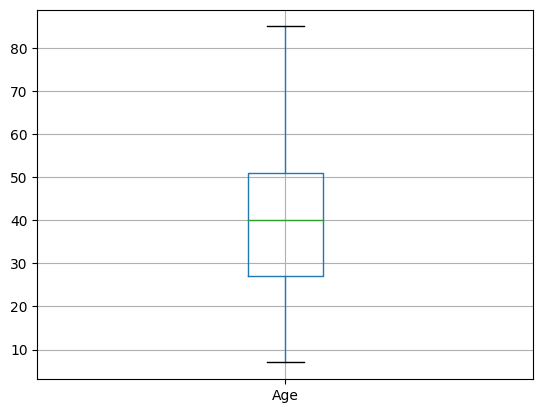

In [13]:
Data.boxplot('Age')
plt.show()

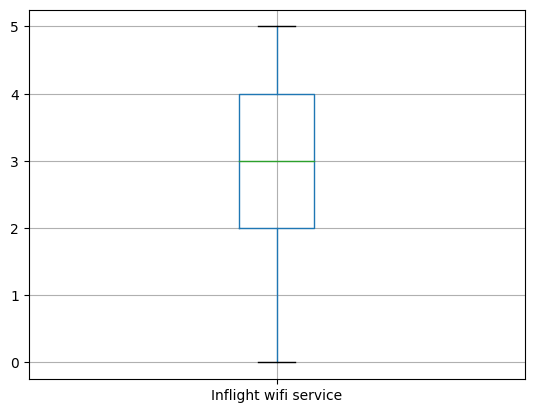

In [14]:
Data.boxplot('Inflight wifi service')
plt.show()

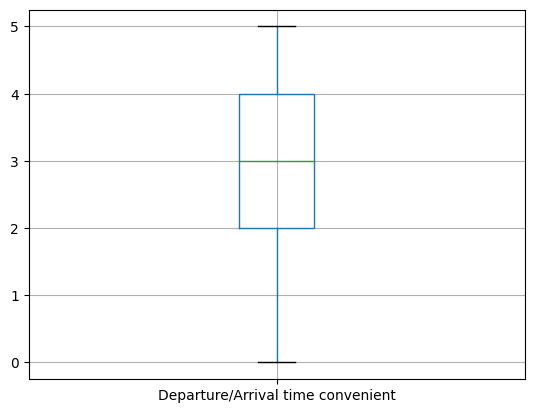

In [15]:
Data.boxplot('Departure/Arrival time convenient')
plt.show()

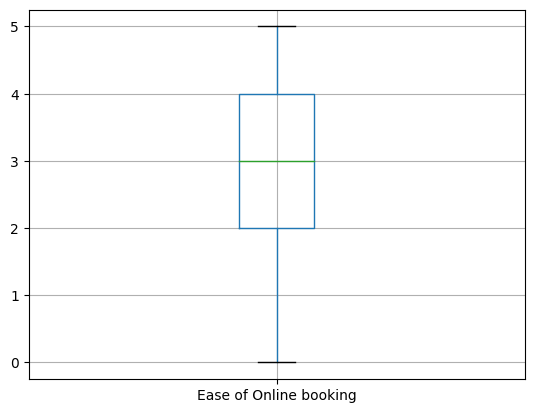

In [16]:
Data.boxplot('Ease of Online booking')
plt.show()

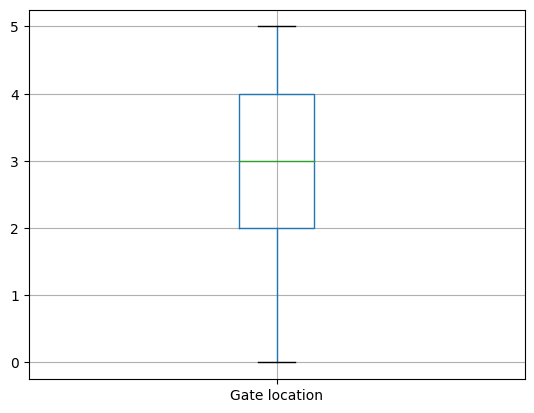

In [17]:
Data.boxplot('Gate location')
plt.show()

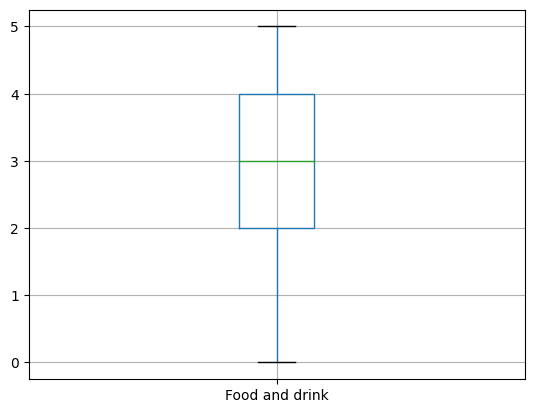

In [18]:
Data.boxplot('Food and drink')
plt.show()

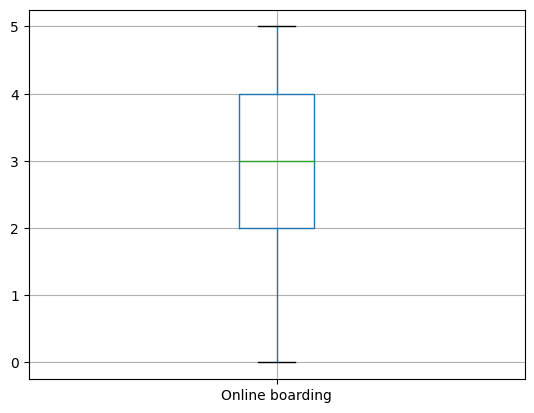

In [19]:
Data.boxplot('Online boarding')
plt.show()

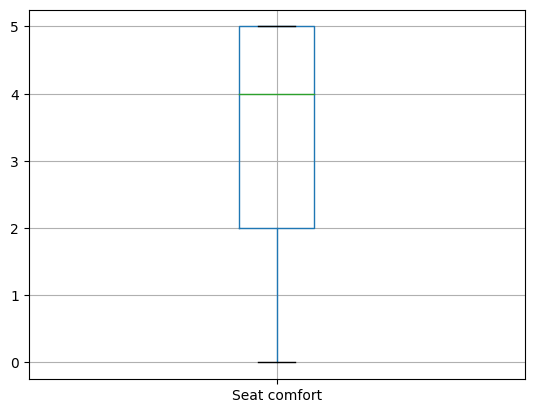

In [20]:
Data.boxplot('Seat comfort')
plt.show()

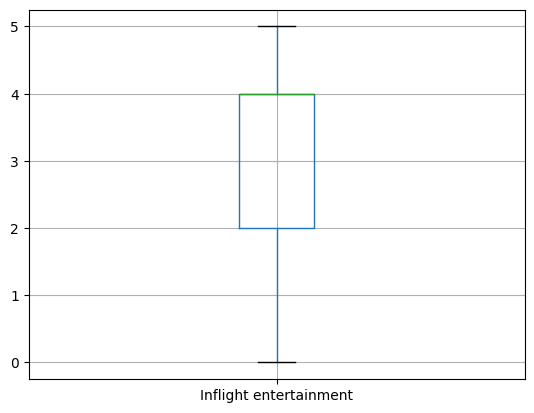

In [21]:
Data.boxplot('Inflight entertainment')
plt.show()

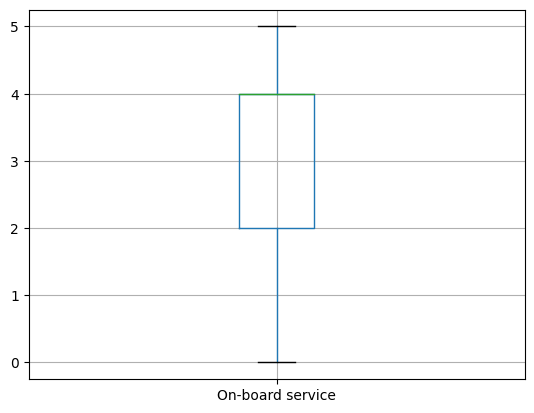

In [22]:
Data.boxplot('On-board service')
plt.show()

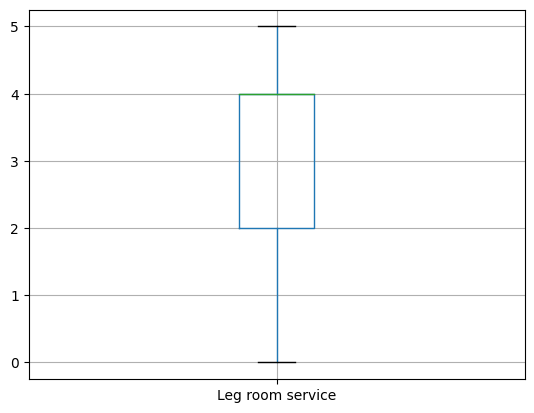

In [23]:
Data.boxplot('Leg room service')
plt.show()

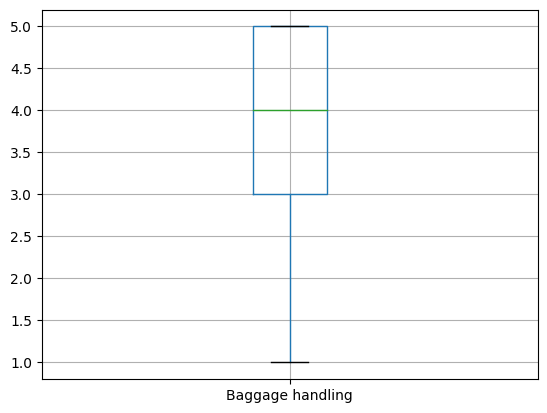

In [24]:
Data.boxplot('Baggage handling')
plt.show()

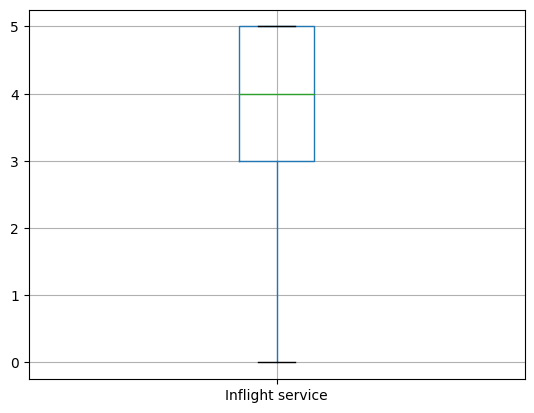

In [25]:
Data.boxplot('Inflight service')
plt.show()

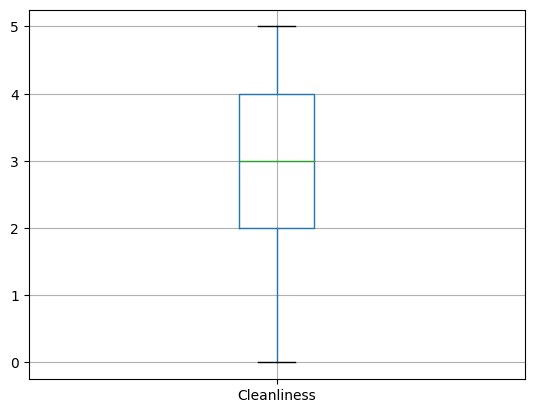

In [26]:
Data.boxplot('Cleanliness')
plt.show()

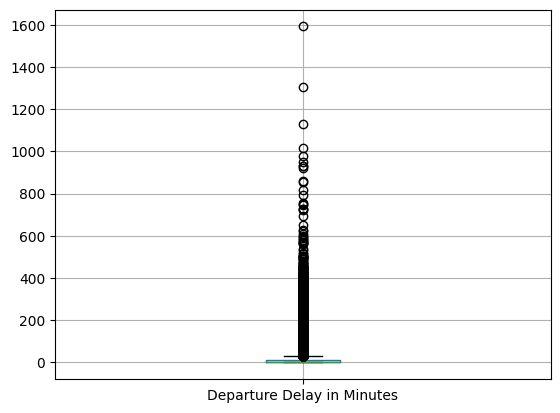

In [27]:
Data.boxplot('Departure Delay in Minutes')
plt.show()

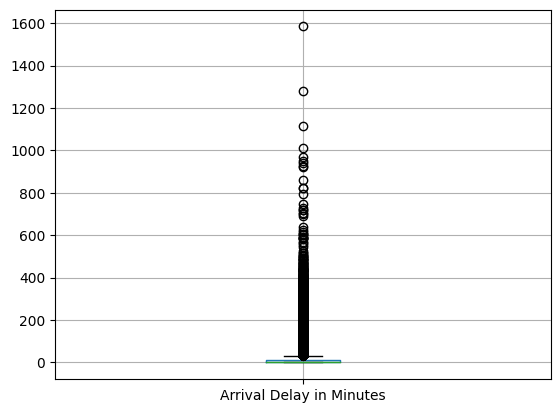

In [28]:
Data.boxplot('Arrival Delay in Minutes')
plt.show()

In [29]:
Data.loc[Data['Departure Delay in Minutes'] > 1100]

Data.loc[Data['Arrival Delay in Minutes'] > 1100]


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
6744,Male,Loyal Customer,32,Business travel,Business,2916,2,2,2,2,...,3,4,5,4,5,3,5,1305,1280.0,satisfied
83741,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,2,3,...,2,4,4,4,2,3,2,1592,1584.0,neutral or dissatisfied
17429,Male,Loyal Customer,8,Personal Travel,Eco,1144,2,5,2,2,...,4,4,3,5,1,3,1,1128,1115.0,neutral or dissatisfied


In [30]:
Data.shape

(129487, 23)

In [31]:
Outliers = Data[Data['Arrival Delay in Minutes'] > 1100].index
Data.drop(Outliers, inplace=True)
Data.shape

(129482, 23)

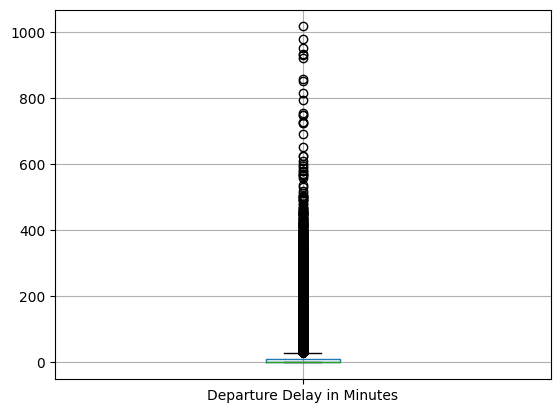

In [32]:
Data.boxplot('Departure Delay in Minutes')
plt.show()

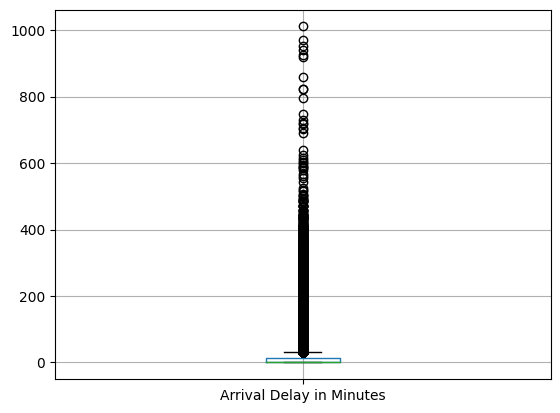

In [33]:


Data.boxplot('Arrival Delay in Minutes')
plt.show()

# Dropping Outliers

In [34]:
Data.shape

(129482, 23)

# scaling and normalizing the data 

**I used here Z-score normalization that Centers the data around 0 and scales it based on the standard deviation. Xstandarized =((X-mean(x))/std(x))**

**-The goal is to bring all features to a similar scale**

In [35]:
num_cols = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
scaler = StandardScaler()
Data[num_cols] = scaler.fit_transform(Data[num_cols])

In [36]:
Data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,-0.731995,3,4,3,1,...,5,4,3,4,4,5,5,0.277877,0.077481,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,-0.957545,3,2,3,3,...,1,1,5,3,1,4,1,-0.364171,-0.238863,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,-0.048327,2,2,2,2,...,5,4,3,4,4,4,5,-0.390923,-0.397035,satisfied
3,Female,Loyal Customer,25,Business travel,Business,-0.629746,2,5,5,5,...,2,2,5,3,1,4,2,-0.096651,-0.159777,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,-0.978597,3,3,3,3,...,3,3,4,4,3,3,3,-0.390923,-0.397035,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,-0.665834,3,3,3,1,...,4,3,2,4,4,5,4,-0.390923,-0.397035,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,-0.545540,4,4,4,4,...,4,4,5,5,5,5,4,-0.390923,-0.397035,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,-0.363095,2,5,1,5,...,2,4,3,4,5,4,2,-0.390923,-0.397035,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,-0.063364,3,3,3,3,...,4,3,2,5,4,5,4,-0.390923,-0.397035,satisfied


# Selecting the Right Visualization Medium:

# 1- Bar Chart

# Example for Bar Chart that visualize number of satisfied and dissatisfied passengers based on Class

<Figure size 1500x600 with 0 Axes>

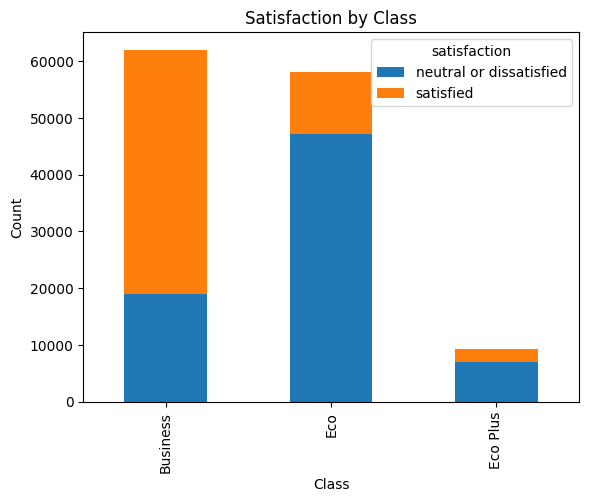

In [37]:
#Bar chart for 'Satisfaction' by 'Class'
#unstack is used to put both in a single bar rather than spliting them.
plt.figure(figsize=(15, 6))
Data.groupby('Class')['satisfaction'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Satisfaction by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


# Another example for Bar Chart that visualize number of satisfied and dissatisfied passengers based on Type of Travel

<Figure size 1500x600 with 0 Axes>

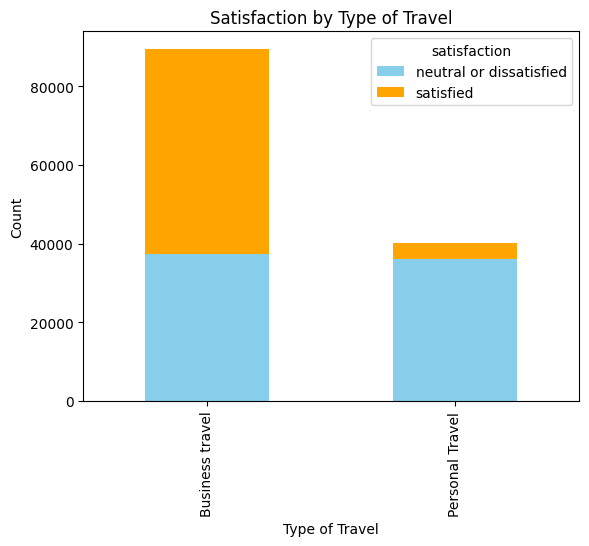

In [38]:
#Bar chart for 'Satisfaction' by 'Type of Travel'

plt.figure(figsize=(15, 6))
Data.groupby('Type of Travel')['satisfaction'].value_counts().unstack().plot(kind='bar', stacked=True,color=['skyblue', 'orange'])
plt.title('Satisfaction by Type of Travel')
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.show()


# subplots

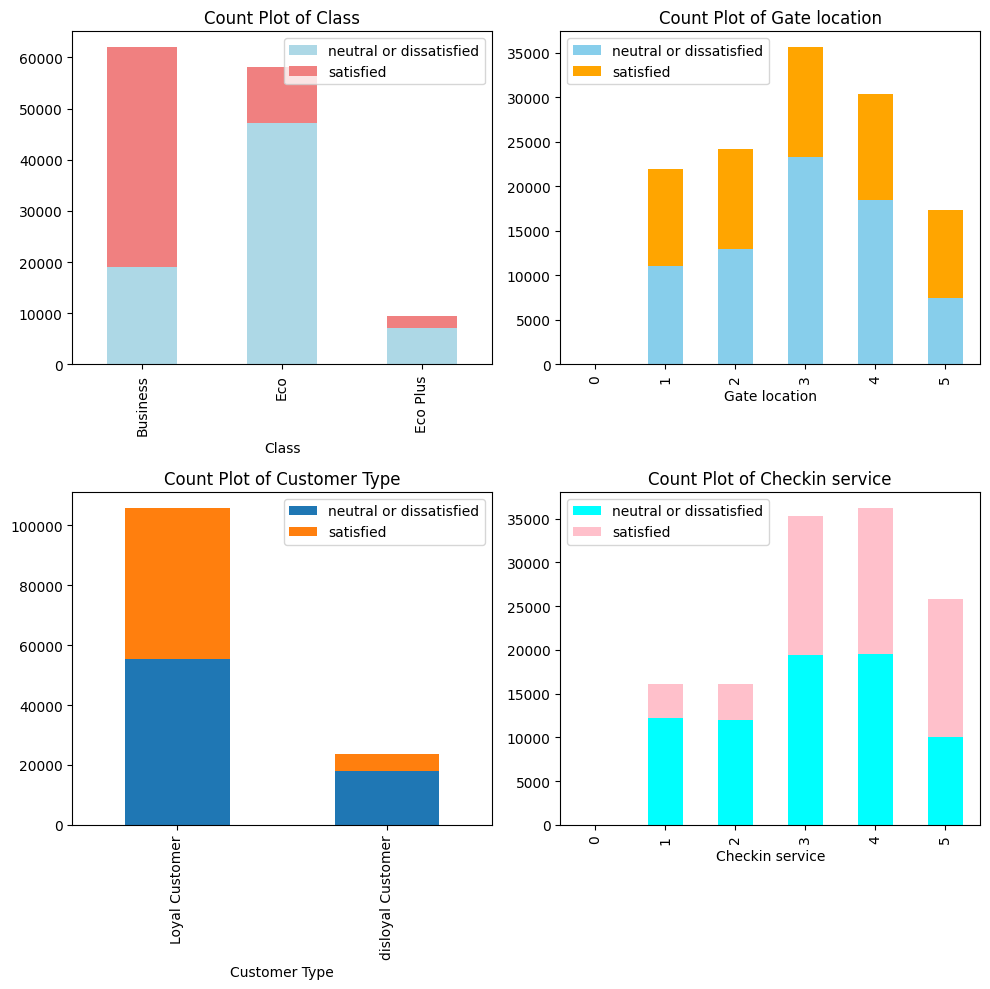

In [39]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
class_count = Data.groupby(['Class', 'satisfaction']).size().unstack()
class_count.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], ax=plt.gca())
plt.title("Count Plot of Class")
plt.legend()

plt.subplot(2, 2, 2)
gate_count = Data.groupby(['Gate location', 'satisfaction']).size().unstack()
gate_count.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=plt.gca())
plt.title("Count Plot of Gate location")
plt.legend()

plt.subplot(2, 2, 3)
customer_count = Data.groupby(['Customer Type', 'satisfaction']).size().unstack()
customer_count.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title("Count Plot of Customer Type")
plt.legend()

plt.subplot(2, 2, 4)
checkin_count = Data.groupby(['Checkin service', 'satisfaction']).size().unstack()
checkin_count.plot(kind='bar', stacked=True, color=['cyan', 'pink'], ax=plt.gca())
plt.title("Count Plot of Checkin service")
plt.legend()

plt.tight_layout()
plt.show()

# 2-Scatter Plot 

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

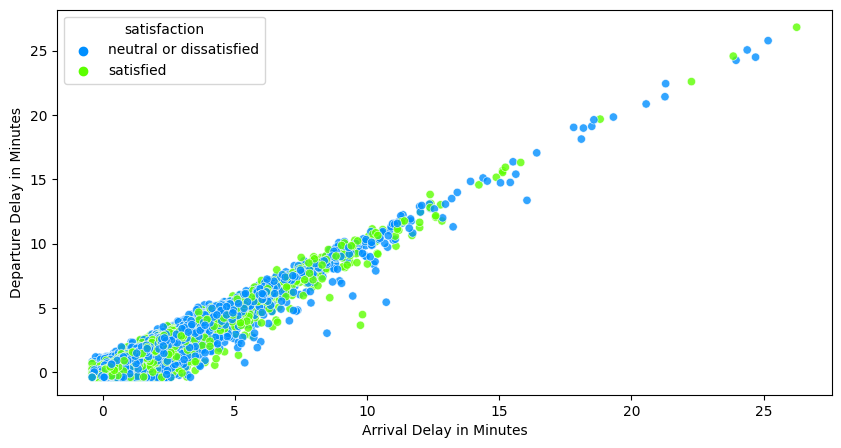

In [40]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=Data,x='Arrival Delay in Minutes',y='Departure Delay in Minutes',
                hue='satisfaction',palette='gist_rainbow_r', alpha=0.8)

# 3-Pie Chart 

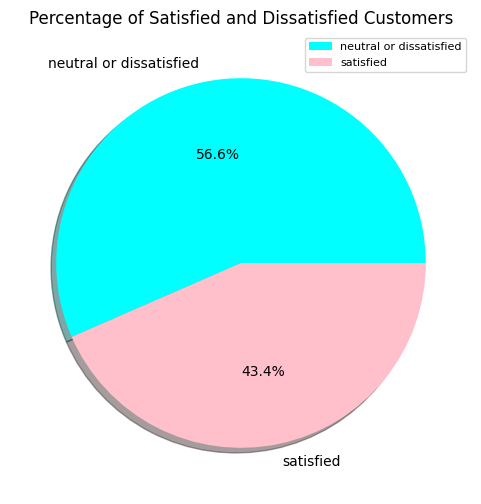

In [41]:
# Count of satisfied and dissatisfied customers
satisfaction_count = Data['satisfaction'].value_counts()

# Plotting pie chart
plt.figure(figsize=(6, 6))
plt.pie(satisfaction_count, labels=satisfaction_count.index, autopct='%1.1f%%', shadow=True,colors=['cyan', 'pink'])
plt.title("Percentage of Satisfied and Dissatisfied Customers")

# add legend
plt.legend(labels=satisfaction_count.index, loc='upper right', fontsize=8)

plt.show()

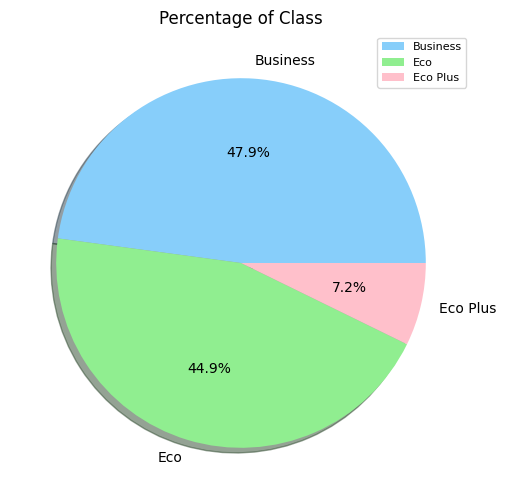

In [42]:
# Count of customers class
satisfaction_count = Data['Class'].value_counts()

# Plotting pie chart
plt.figure(figsize=(6, 6))
plt.pie(satisfaction_count, labels=satisfaction_count.index,shadow=True, autopct='%1.1f%%',colors=['lightskyblue', 'lightgreen', 'pink'])
plt.title("Percentage of Class")

# add legend
plt.legend(labels=satisfaction_count.index, loc='upper right', fontsize=8)

plt.show()

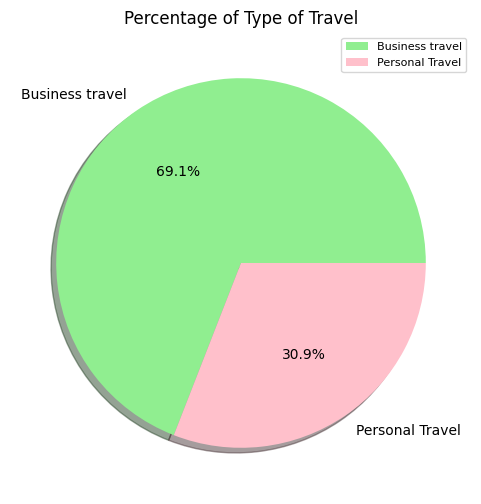

In [43]:
# Count of customers Type of Travel
satisfaction_count = Data['Type of Travel'].value_counts()

# Plotting pie chart
plt.figure(figsize=(6, 6))
plt.pie(satisfaction_count, labels=satisfaction_count.index,shadow=True, autopct='%1.1f%%',colors=['lightgreen', 'pink'])
plt.title("Percentage of Type of Travel")

# add legend
plt.legend(labels=satisfaction_count.index, loc='upper right', fontsize=8)

plt.show()

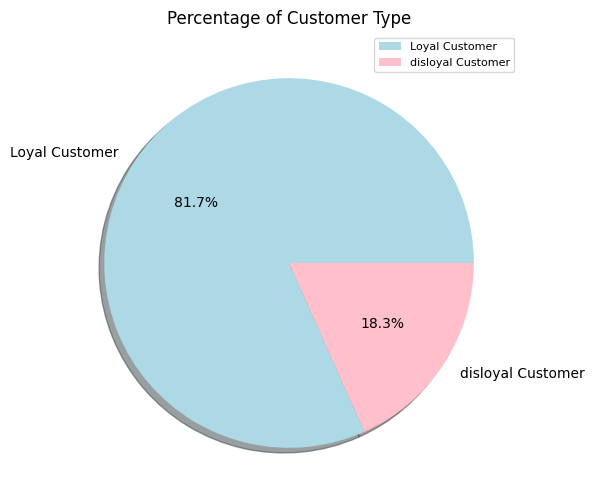

In [44]:
# Count of customers Type 
satisfaction_count = Data['Customer Type'].value_counts()

# Plotting pie chart
plt.figure(figsize=(6, 6))
plt.pie(satisfaction_count, labels=satisfaction_count.index,shadow=True, autopct='%1.1f%%',colors=['lightblue', 'pink'])
plt.title("Percentage of Customer Type")

# add legend
plt.legend(labels=satisfaction_count.index, loc='upper right', fontsize=8)

plt.show()

# 4-Histogram

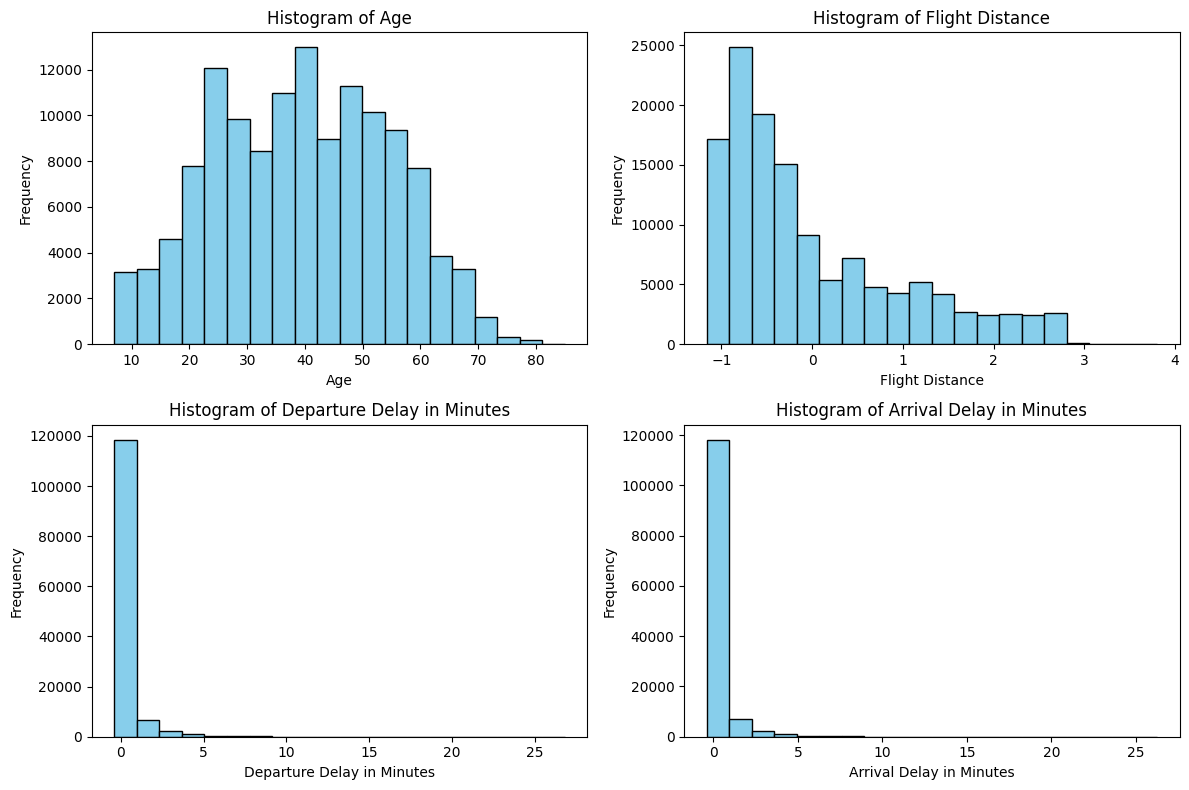

In [45]:
numerical_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Plot histograms
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(Data[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Machine learning model

# what are the inputs and what is the output ?

These columns are the **input** of my model :

Gender , Customer Type , Age , Type of Travel ,Class , Flight Distance , Inflight wifi service , Departure/Arrival time convenient, Ease of Online booking, Gate location , Food and drink, Online boarding , Seat comfort ,Inflight entertainment , On-board service , Leg room service , Baggage handling , Checkin service , Inflight service , Cleanliness , Departure Delay in Minutes , Arrival Delay in Minutes

the **output** will be **satisfaction** column


# label Encoding

In [46]:
Data['Gender']

0          Male
1          Male
2        Female
3        Female
4          Male
          ...  
25971      Male
25972      Male
25973    Female
25974      Male
25975    Female
Name: Gender, Length: 129482, dtype: object

In [47]:
Gender= {'Male':0,'Female':1}
Data['Gender'] = Data['Gender'].map(Gender)
Data['Gender']

0        0
1        0
2        1
3        1
4        0
        ..
25971    0
25972    0
25973    1
25974    0
25975    1
Name: Gender, Length: 129482, dtype: int64

In [48]:
Data['Customer Type']

0           Loyal Customer
1        disloyal Customer
2           Loyal Customer
3           Loyal Customer
4           Loyal Customer
               ...        
25971    disloyal Customer
25972       Loyal Customer
25973       Loyal Customer
25974       Loyal Customer
25975       Loyal Customer
Name: Customer Type, Length: 129482, dtype: object

In [49]:
Customer= {'Loyal Customer':0,'disloyal Customer':1}
Data['Customer Type'] = Data['Customer Type'].map(Customer)
Data['Customer Type']

0        0
1        1
2        0
3        0
4        0
        ..
25971    1
25972    0
25973    0
25974    0
25975    0
Name: Customer Type, Length: 129482, dtype: int64

In [50]:
Data['Type of Travel']

0        Personal Travel
1        Business travel
2        Business travel
3        Business travel
4        Business travel
              ...       
25971    Business travel
25972    Business travel
25973    Personal Travel
25974    Business travel
25975    Personal Travel
Name: Type of Travel, Length: 129482, dtype: object

In [51]:
Taverl_type = {'Personal Travel':0,'Business travel':1}
Data['Type of Travel'] = Data['Type of Travel'].map(Taverl_type)
Data['Type of Travel']

0        0
1        1
2        1
3        1
4        1
        ..
25971    1
25972    1
25973    0
25974    1
25975    0
Name: Type of Travel, Length: 129482, dtype: int64

In [52]:
Data['satisfaction']

0        neutral or dissatisfied
1        neutral or dissatisfied
2                      satisfied
3        neutral or dissatisfied
4                      satisfied
                  ...           
25971    neutral or dissatisfied
25972                  satisfied
25973    neutral or dissatisfied
25974                  satisfied
25975    neutral or dissatisfied
Name: satisfaction, Length: 129482, dtype: object

In [53]:
Satisfaction= {'neutral or dissatisfied':0,'satisfied':1}
Data['satisfaction'] = Data['satisfaction'].map(Satisfaction)
Data['satisfaction']

0        0
1        0
2        1
3        0
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 129482, dtype: int64

# One Hot Encoding

In [54]:
Data['Class']

0        Eco Plus
1        Business
2        Business
3        Business
4        Business
           ...   
25971    Business
25972    Business
25973         Eco
25974    Business
25975         Eco
Name: Class, Length: 129482, dtype: object

In [55]:
Dummies = pd.get_dummies(Data['Class'])
Data = pd.concat([Data, Dummies], axis=1)
Data = Data.drop('Class', axis=1)
Data

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus
0,0,0,13,0,-0.731995,3,4,3,1,5,...,4,4,5,5,0.277877,0.077481,0,False,False,True
1,0,1,25,1,-0.957545,3,2,3,3,1,...,3,1,4,1,-0.364171,-0.238863,0,True,False,False
2,1,0,26,1,-0.048327,2,2,2,2,5,...,4,4,4,5,-0.390923,-0.397035,1,True,False,False
3,1,0,25,1,-0.629746,2,5,5,5,2,...,3,1,4,2,-0.096651,-0.159777,0,True,False,False
4,0,0,61,1,-0.978597,3,3,3,3,4,...,4,3,3,3,-0.390923,-0.397035,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0,1,34,1,-0.665834,3,3,3,1,4,...,4,4,5,4,-0.390923,-0.397035,0,True,False,False
25972,0,0,23,1,-0.545540,4,4,4,4,4,...,5,5,5,4,-0.390923,-0.397035,1,True,False,False
25973,1,0,17,0,-0.363095,2,5,1,5,2,...,4,5,4,2,-0.390923,-0.397035,0,False,True,False
25974,0,0,14,1,-0.063364,3,3,3,3,4,...,5,4,5,4,-0.390923,-0.397035,1,True,False,False


In [56]:
Data

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus
0,0,0,13,0,-0.731995,3,4,3,1,5,...,4,4,5,5,0.277877,0.077481,0,False,False,True
1,0,1,25,1,-0.957545,3,2,3,3,1,...,3,1,4,1,-0.364171,-0.238863,0,True,False,False
2,1,0,26,1,-0.048327,2,2,2,2,5,...,4,4,4,5,-0.390923,-0.397035,1,True,False,False
3,1,0,25,1,-0.629746,2,5,5,5,2,...,3,1,4,2,-0.096651,-0.159777,0,True,False,False
4,0,0,61,1,-0.978597,3,3,3,3,4,...,4,3,3,3,-0.390923,-0.397035,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0,1,34,1,-0.665834,3,3,3,1,4,...,4,4,5,4,-0.390923,-0.397035,0,True,False,False
25972,0,0,23,1,-0.545540,4,4,4,4,4,...,5,5,5,4,-0.390923,-0.397035,1,True,False,False
25973,1,0,17,0,-0.363095,2,5,1,5,2,...,4,5,4,2,-0.390923,-0.397035,0,False,True,False
25974,0,0,14,1,-0.063364,3,3,3,3,4,...,5,4,5,4,-0.390923,-0.397035,1,True,False,False


## Correlation with BALANCE variable

In [57]:
cor_target = abs(Data.corr()['satisfaction'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features.sort_values(ascending=False)

satisfaction                         1.000000
Business                             0.502602
Online boarding                      0.501645
Type of Travel                       0.449776
Eco                                  0.449493
Inflight entertainment               0.398326
Seat comfort                         0.348544
On-board service                     0.322341
Leg room service                     0.312550
Cleanliness                          0.306866
Flight Distance                      0.298213
Inflight wifi service                0.283316
Baggage handling                     0.248654
Inflight service                     0.245019
Checkin service                      0.237117
Food and drink                       0.211145
Customer Type                        0.185924
Ease of Online booking               0.168724
Age                                  0.134004
Eco Plus                             0.106119
Arrival Delay in Minutes             0.058909
Departure/Arrival time convenient 

<Axes: xlabel='satisfaction', ylabel='Online boarding'>

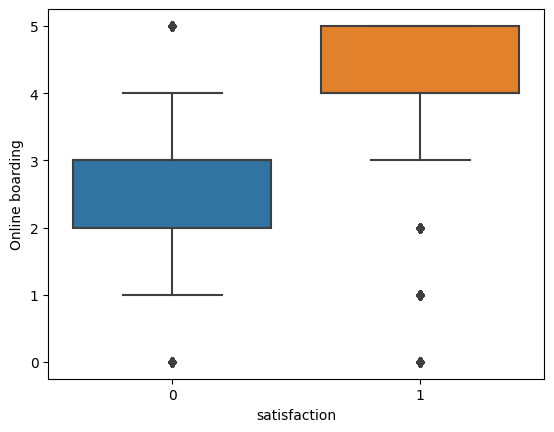

In [58]:
sns.boxplot(x='satisfaction', y='Online boarding', data=Data)

## Correlation matrix

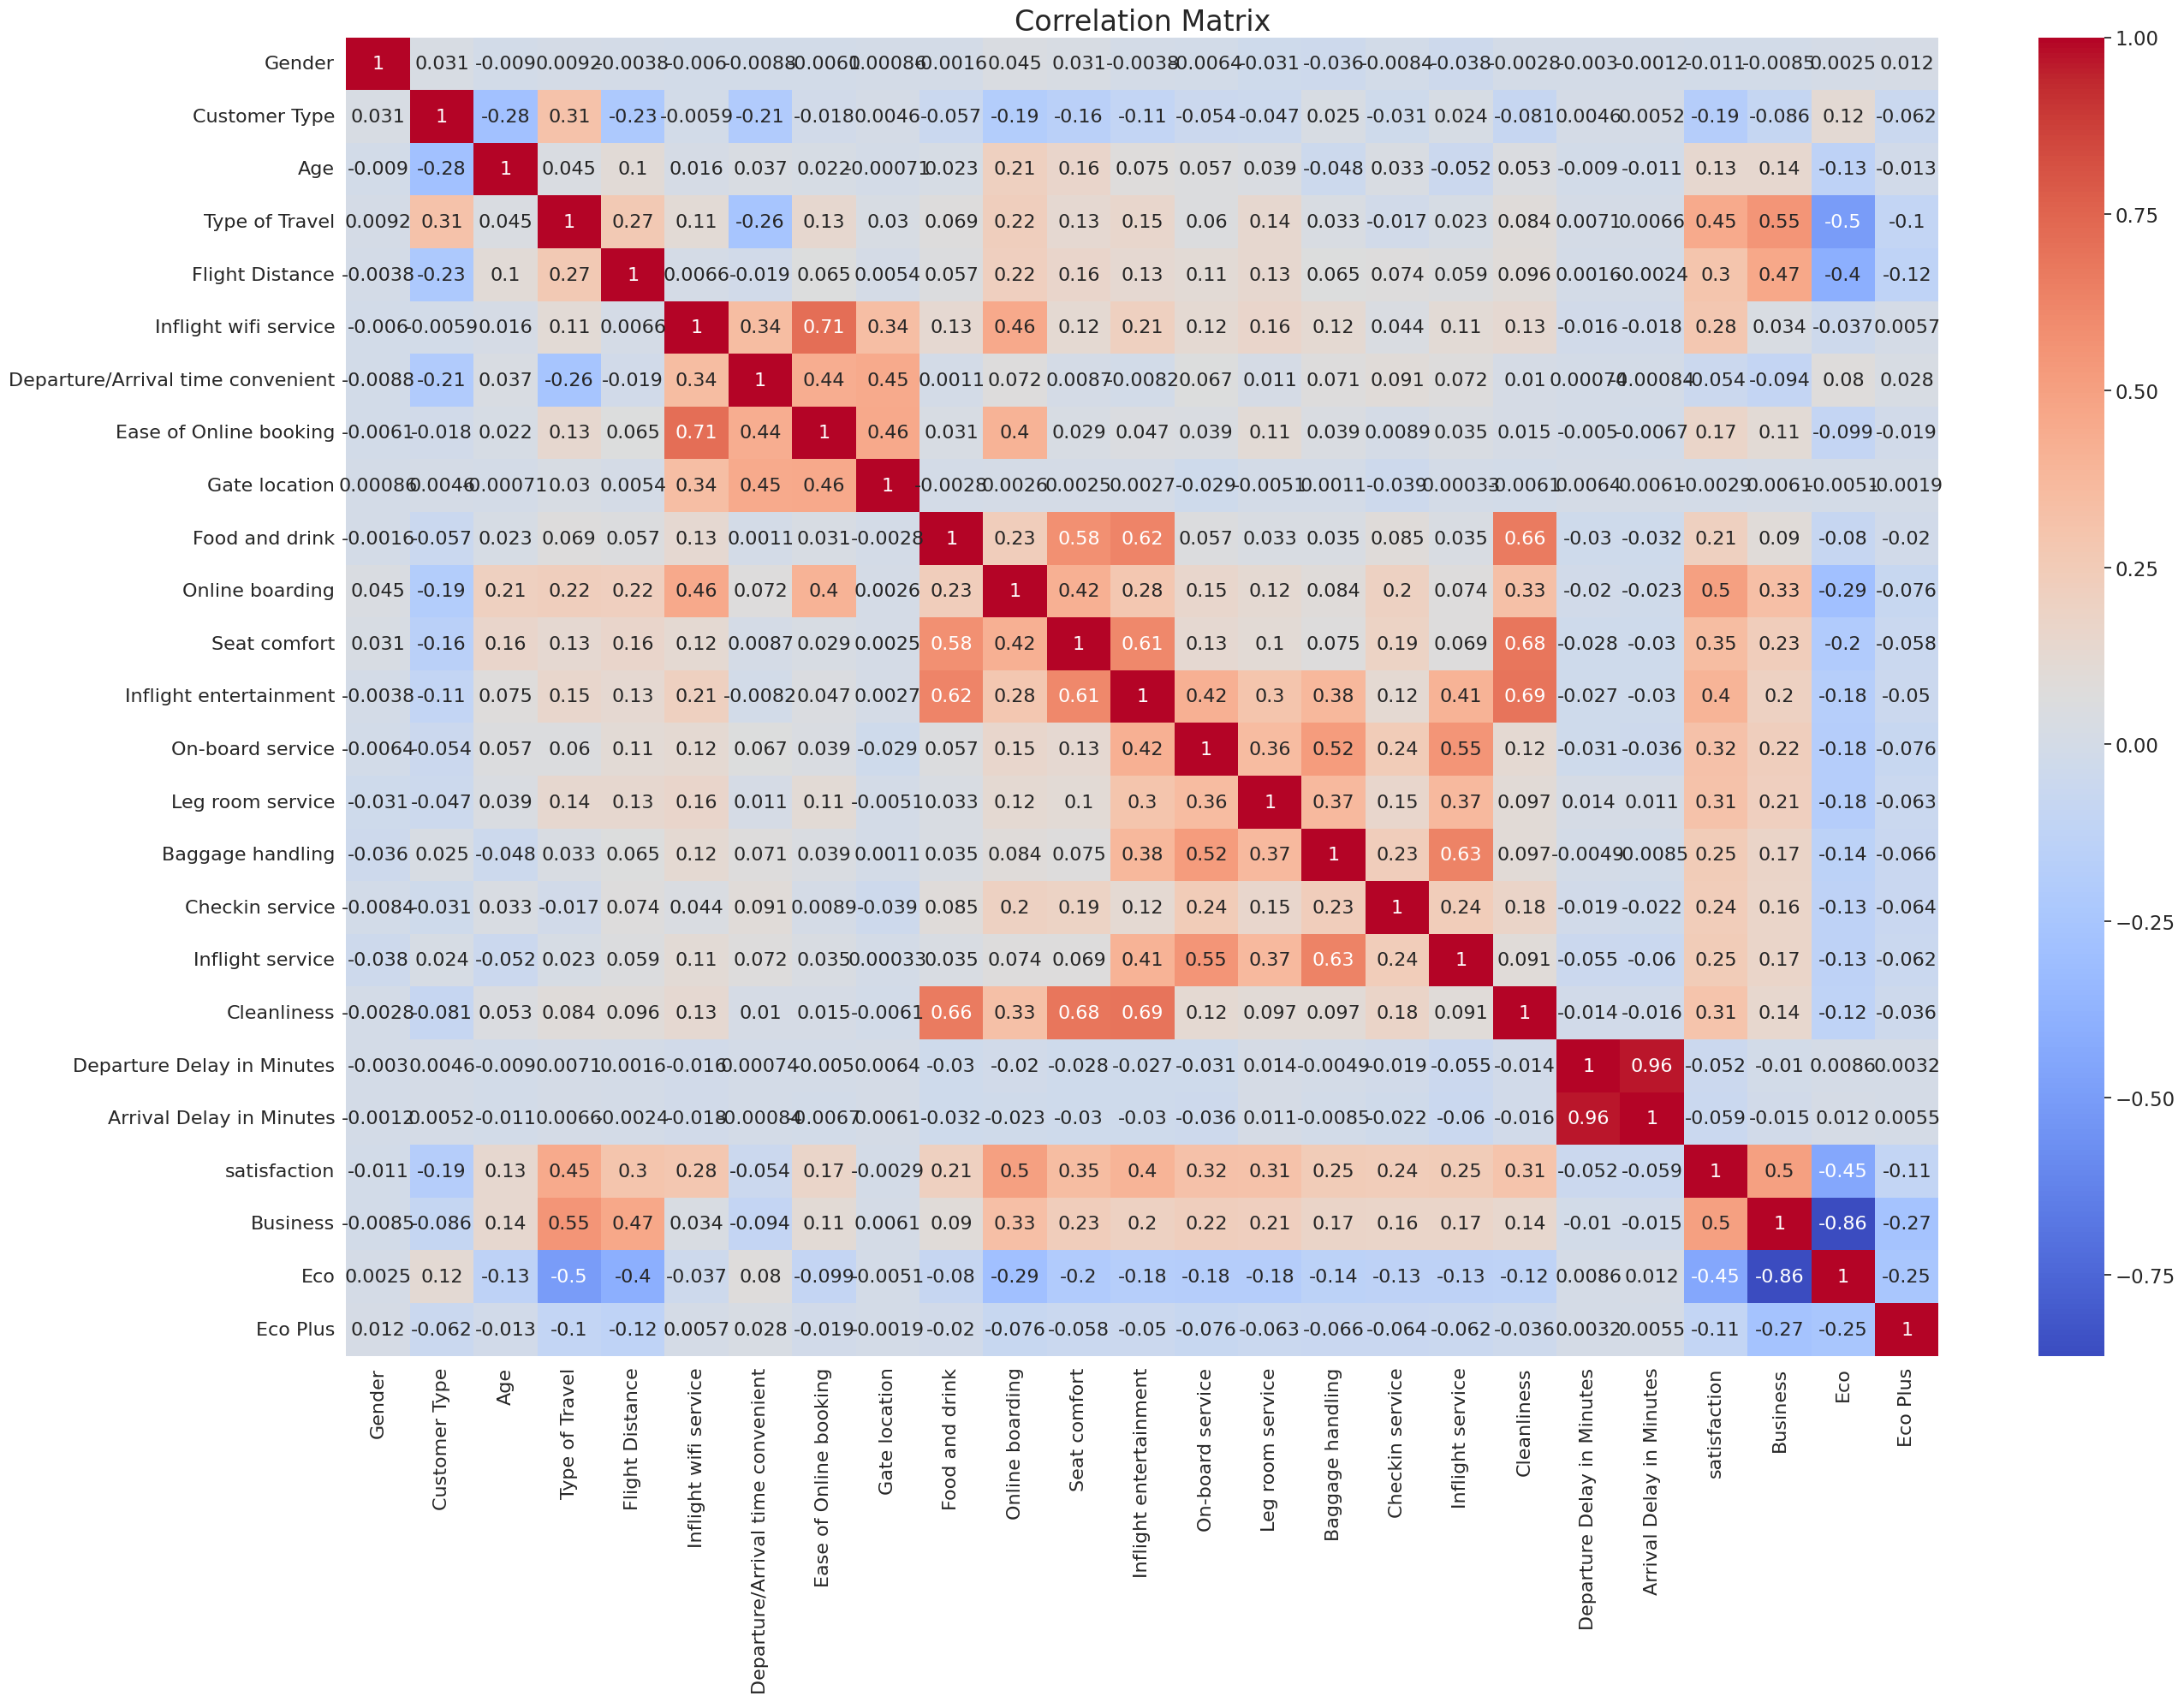

In [59]:
correlation_matrix = Data.corr()
plt.figure(figsize=(30, 20))
sns.set(font_scale=1.5)
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={'fontsize': 16})
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=16)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=16)
plt.title('Correlation Matrix', fontsize=24)
plt.show()

# Determine Features and Target

In [60]:
Data.shape

(129482, 25)

In [61]:
Features = Data.drop('satisfaction', axis=1)
Target = Data['satisfaction']

In [62]:
Features

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Business,Eco,Eco Plus
0,0,0,13,0,-0.731995,3,4,3,1,5,...,3,4,4,5,5,0.277877,0.077481,False,False,True
1,0,1,25,1,-0.957545,3,2,3,3,1,...,5,3,1,4,1,-0.364171,-0.238863,True,False,False
2,1,0,26,1,-0.048327,2,2,2,2,5,...,3,4,4,4,5,-0.390923,-0.397035,True,False,False
3,1,0,25,1,-0.629746,2,5,5,5,2,...,5,3,1,4,2,-0.096651,-0.159777,True,False,False
4,0,0,61,1,-0.978597,3,3,3,3,4,...,4,4,3,3,3,-0.390923,-0.397035,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0,1,34,1,-0.665834,3,3,3,1,4,...,2,4,4,5,4,-0.390923,-0.397035,True,False,False
25972,0,0,23,1,-0.545540,4,4,4,4,4,...,5,5,5,5,4,-0.390923,-0.397035,True,False,False
25973,1,0,17,0,-0.363095,2,5,1,5,2,...,3,4,5,4,2,-0.390923,-0.397035,False,True,False
25974,0,0,14,1,-0.063364,3,3,3,3,4,...,2,5,4,5,4,-0.390923,-0.397035,True,False,False


In [63]:
Target

0        0
1        0
2        1
3        0
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 129482, dtype: int64

# Splitting dataset to tree parts Training, Validation and Testing.

In [64]:
X, X_test, y, y_test = train_test_split(Features, Target,
                                        test_size = 0.20, random_state = 2)
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                        test_size = 0.20, random_state = 2)

In [65]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(82868, 24)
(82868,)
(25897, 24)
(25897,)


In [66]:
train_acc=[]
val_acc=[]
test_acc=[]

# **Model**

## Decision Tree Classifier Model

### The best values for HyperParameters using GridSearchCV 

**criterion**: This hyperparameter determines the function used to measure the quality of a split. The two options are 'gini' (Gini impurity) and 'entropy' (information gain). ***The default value is 'gini'***.

**max_depth**: This hyperparameter determines the maximum depth of the decision tree. ***The default value is None***, which means that nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**splitter**: This hyperparameter determines the strategy used to choose the split at each node. The two options are 'best' (choose the best split) and 'random' (choose the best random split). ***The default value is 'best'***.

In [67]:
# # define the parameter grid to search over
param_grid = {
     'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10,15, None],
    'splitter': ['best', 'random'],
 }

# # create a decision tree model instance
dt = DecisionTreeClassifier()

# # create a GridSearchCV instance with the parameter grid and the decision tree model
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

 # fit the GridSearchCV instance on the training data
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
y_pred_grid_search = grid_search.predict(X_test)
    
 # print the best hyperparameters and corresponding score
print("Train Score: ",grid_search.fit(X_train, y_train).score(X_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, grid_search.predict(X_val)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_grid_search))
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

DecisionTreeClassifier(max_depth=15)
Train Score:  0.9747550320992422
Validation Accuracy: 0.9551576000386156
Test Accuracy: 0.9520021624126347
Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 15, 'splitter': 'best'}
Best Score:  0.950704695880167


### Train Decision Tree Classifier

In [68]:
DT = DecisionTreeClassifier(criterion='entropy',
                           max_depth=15,
                           splitter='random',
                           min_samples_split=5)
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=5,
                       splitter='random')

### Make predictions on the test data

In [69]:
y_pred_DT = DT.predict(X_test)

### Evaluate the performance of the model

In [70]:
train_acc.append(DT.score(X_train, y_train))
val_acc.append(accuracy_score(y_val, DT.predict(X_val)))
test_acc.append(accuracy_score(y_test, y_pred_DT))
print("Train Accuracy:", DT.score(X_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, DT.predict(X_val)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_DT))
print("Recall:", recall_score(y_test, y_pred_DT))
print("Precision:", precision_score(y_test, y_pred_DT))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_DT))
print("Classification report:\n", classification_report(y_test, y_pred_DT))
CM=confusion_matrix(y_test, y_pred_DT)

Train Accuracy: 0.9646184293092629
Validation Accuracy: 0.952840662258049
Test Accuracy: 0.9488357724832992
Recall: 0.9275452841973766
Precision: 0.9529702970297029
Confusion matrix:
 [[14177   513]
 [  812 10395]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     14690
           1       0.95      0.93      0.94     11207

    accuracy                           0.95     25897
   macro avg       0.95      0.95      0.95     25897
weighted avg       0.95      0.95      0.95     25897



### Importance of Selected features for model 

<Figure size 1000x1000 with 0 Axes>

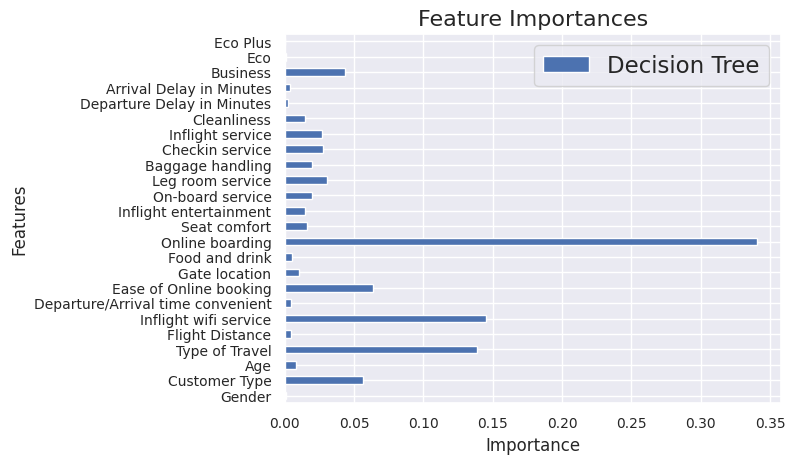

In [71]:
df = pd.DataFrame(DT.feature_importances_)
df.index=X_train.columns
df = df.rename(columns={0: 'Decision Tree'})
plt.figure(figsize=(10, 10))
ax = df.plot.barh()
ax.set_xlabel('Importance', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.tick_params(axis='x', labelsize=10)
plt.title('Feature Importances', fontsize=16)
plt.show()